## Import Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)

In [62]:
df = pd.read_csv('BRI.csv')
df

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,3,1,2,level_4,2.32,1987,30.0,30,9,7,0,8,0,0,68.850000,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,3,2,1,level_4,3.25,2001,15.0,16,7,7,9,3,0,0,94.810000,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,1,0,1,level_5,3.23,2007,15.0,15,9,9,0,6,0,0,72.820000,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,0,0,0,level_3,0.00,2006,8.0,8,5,5,0,3,0,0,86.890000,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,1,0,1,NaN,NaN,NaN,7.0,7,4,6,11,2,1,1,95.170000,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22000,JG04,1.50,PG03,1.50,3.42,RM_type_B,Permanent,Male,1986,Y,1,0,1,level_4,2.84,2009,5.0,5,2,2,0,2,0,0,71.776667,75.53,0.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22001,JG03,0.42,PG01,0.42,0.42,RM_type_B,Contract,Male,1991,N,0,0,0,level_4,3.28,2014,NaN,1,1,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22002,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1983,Y,2,0,2,level_4,3.10,2006,7.0,7,5,4,0,3,2,0,108.856667,111.65,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
22003,JG04,1.50,PG03,1.50,0.00,RM_type_A,Permanent,Male,1988,Y,1,0,1,level_4,3.69,2010,6.0,6,5,4,0,13,0,0,76.366667,79.65,0.0,Pencapaian 100%-150%,Pencapaian 50%-100%,not reached


As shown above, age columns actually contains year of birth. Thus we are going to substract current year with the year of birth to get age features.

In [3]:
df['age'] = 2021 - df['age']

In [4]:
df['age'].head()

0    57
1    42
2    41
3    37
4    37
Name: age, dtype: int64

column names list:

In [5]:
list(df.columns)

['job_level',
 'job_duration_in_current_job_level',
 'person_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'Employee_type',
 'Employee_status',
 'gender',
 'age',
 'marital_status_maried(Y/N)',
 'number_of_dependences',
 'number_of_dependences (male)',
 'number_of_dependences (female)',
 'Education_level',
 'GPA',
 'year_graduated',
 'job_duration_as_permanent_worker',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Best Performance',
 'Avg_achievement_%',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal',
 'achievement_target_1',
 'achievement_target_2',
 'achievement_target_3']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22005 entries, 0 to 22004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              22005 non-null  object 
 1   job_duration_in_current_job_level      22005 non-null  float64
 2   person_level                           22005 non-null  object 
 3   job_duration_in_current_person_level   22005 non-null  float64
 4   job_duration_in_current_branch         22005 non-null  float64
 5   Employee_type                          21993 non-null  object 
 6   Employee_status                        22005 non-null  object 
 7   gender                                 22005 non-null  object 
 8   age                                    22005 non-null  int64  
 9   marital_status_maried(Y/N)             22005 non-null  object 
 10  number_of_dependences                  22005 non-null  int64  
 11  nu

Based on above info, year_graduated feature have object type of data. This is because there are some data that depict nan values and other typo as object as shown below.

In [7]:
df['year_graduated'].unique()

array(['1987', '2001', '2007', '2006', nan, '2008', '2011', '2010',
       '2013', '2014', '\\N', '1996', '2009', '2005', '2012', '1989',
       '1992', '0', '2000', '1994', '1997', '1993', '1995', '2004',
       '2015', '1986', '1999', '2003', '2016', '2044', '2018', '1991',
       '2002', '2017', '2201', '1998', '1990', '9999', '1984', '2020',
       '1988', '1983', '1985', '201', '2019', '2031', '____', '3016', '-',
       '2200', '102', '2999', '9464'], dtype=object)

There is a lot of strange data such as : 

0, \N, 9999, 2999, 2201, -, 2200, ____, 201, 3016, 2031, 102, 2044, and 9464 

Thus we are going to replace these values into np.nan.

In [8]:
strange_data = ['0',r'\N','9999','2999','2201','-','2200','____','201','3016','2031','102','2044','9464']
df['year_graduated']=df['year_graduated'].replace(strange_data,np.nan).astype(float).astype('Int64')

In [9]:
df['year_graduated'].unique()

<IntegerArray>
[1987, 2001, 2007, 2006, <NA>, 2008, 2011, 2010, 2013, 2014, 1996, 2009, 2005,
 2012, 1989, 1992, 2000, 1994, 1997, 1993, 1995, 2004, 2015, 1986, 1999, 2003,
 2016, 2018, 1991, 2002, 2017, 1998, 1990, 1984, 2020, 1988, 1983, 1985, 2019]
Length: 39, dtype: Int64

### Getting to Know The Data

In [10]:
df.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      3503
year_graduated                           4134
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                      

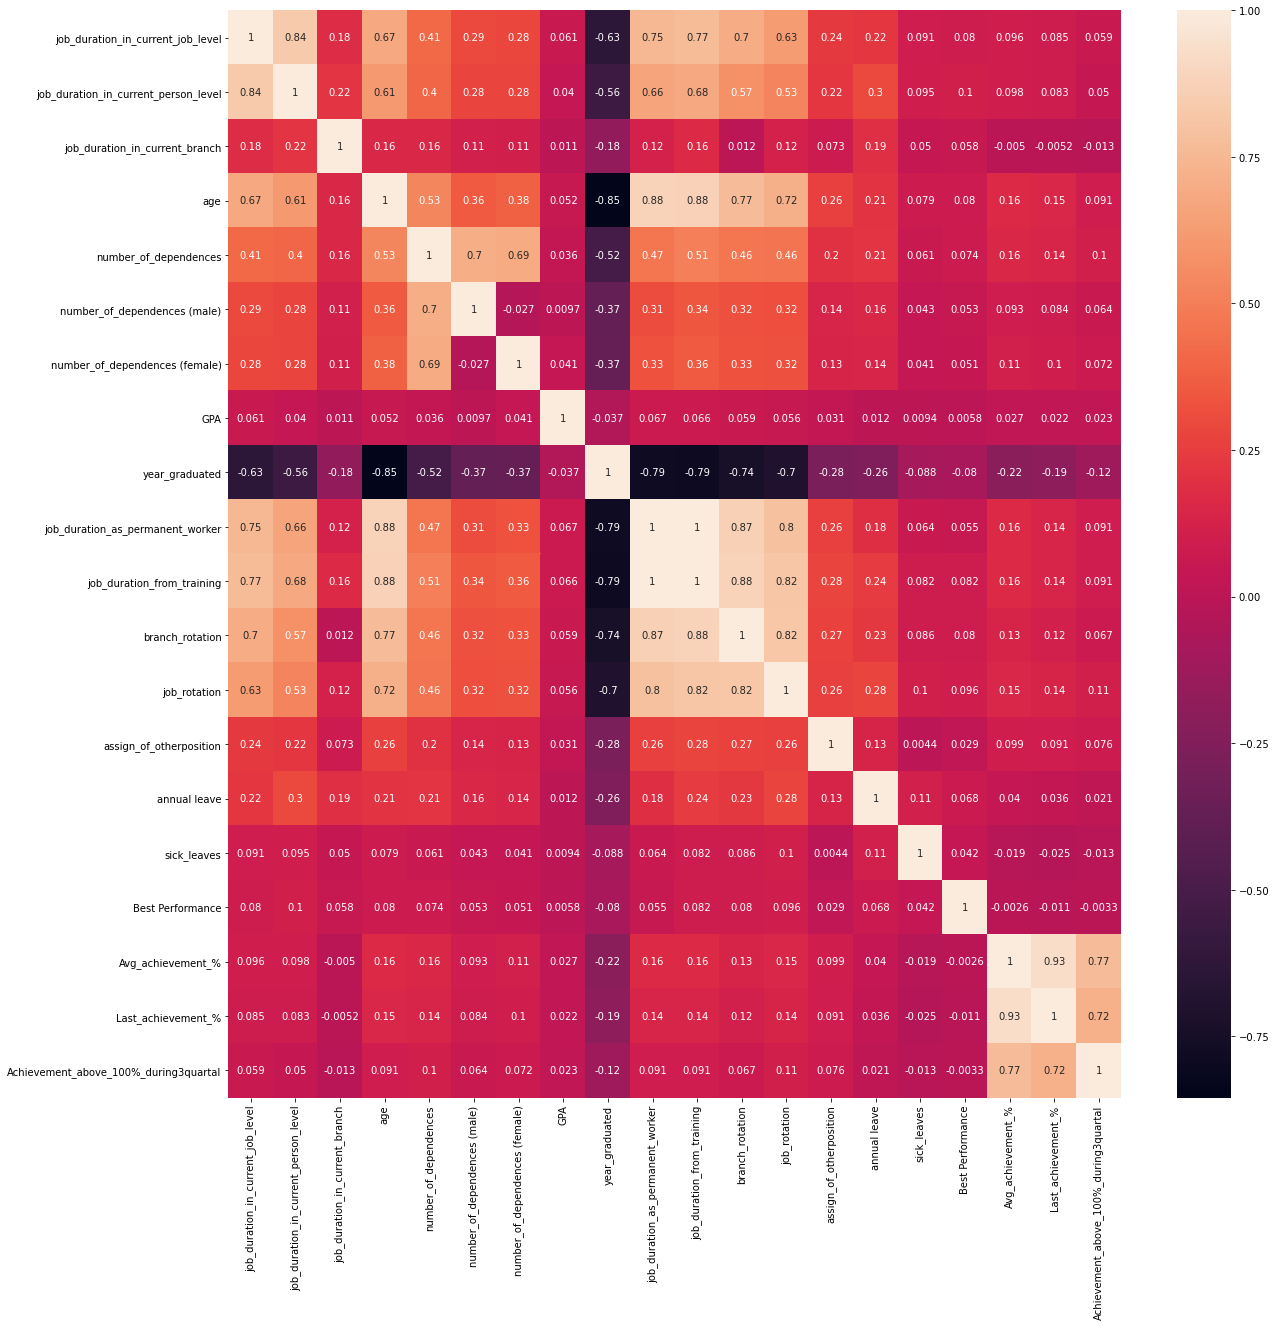

In [11]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),annot=True)
plt.show()

As shown above, year_graduated is highly correlated with age which is true.

Job duration as permanent worker have a correlation coefficient of 1 with job duration from training. This indicates the possibilities that these 2 features are the same. However, job duration as permanent worker have a lot of missing values due to Employee Status being 'Contract'. Based on this reasoning, we are going to drop job duration as permanent worker as it is defined by job duration from training and employee status.

In [12]:
df[df['Employee_status']=='Contract']['job_duration_as_permanent_worker'].sum()

0.0

In [13]:
df.drop(['job_duration_as_permanent_worker'],axis=1,inplace=True)

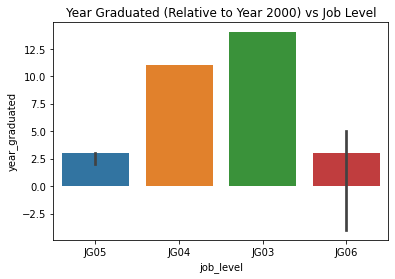

In [14]:
sns.barplot(x=df['job_level'],y=df['year_graduated']-2000, estimator=np.median)
plt.title('Year Graduated (Relative to Year 2000) vs Job Level')
plt.show()

In [15]:
df.groupby('job_level').median()['year_graduated']

job_level
JG03    2014
JG04    2011
JG05    2003
JG06    2003
Name: year_graduated, dtype: Int64

From above plot, we can see that job_level JG05 and JG06 tend to be handled by a person with graduation year before 2010. On the other hand, job level JG03 and JG04 tend to be handled by a person with graduation year after 2010.

## Preprocessing

On the dataset, we also see that there is a GPA value above 4 and 0 which doesnt make sense.

In [16]:
df['GPA'].value_counts()

0.00     3853
3.00      541
3.01      353
3.10      296
3.14      294
         ... 
8.41        1
4.19        1
8.69        1
8.29        1
32.12       1
Name: GPA, Length: 241, dtype: int64

In order to clear things, we make the GPA value of 0 and above 4 into nan values and then impute it with KNN Imputer.

In [17]:
df['GPA'] = df['GPA'].replace(0,np.nan)
df['GPA'] = np.where(df['GPA']>4,np.nan,df['GPA'])

### Handling Missing Values

In [18]:
df.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                              12
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3608
GPA                                      7421
year_graduated                           4134
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

### Split Data

In [19]:
from sklearn.model_selection import train_test_split
x = df.drop('Best Performance',axis=1)
y = df['Best Performance']

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.3,random_state=2020)

In [20]:
x_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),number_of_dependences,number_of_dependences (male),number_of_dependences (female),Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
21952,JG04,8.00,PG04,6.00,0.50,RM_type_A,Permanent,Female,49,Y,2,1,1,level_4,3.49,1996,22,12,8,1,5,3,97.783333,100.23,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,reached
19060,JG04,1.75,PG03,1.75,0.00,RM_type_A,Permanent,Male,32,Y,1,0,1,NaN,NaN,<NA>,4,2,3,0,2,5,96.176667,92.32,3.0,Pencapaian 50%-100%,Pencapaian 50%-100%,not reached
14007,JG03,0.08,PG01,0.08,0.08,RM_type_B,Contract,Male,26,N,0,0,0,level_3,3.16,2016,1,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1649,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,42,Y,1,0,1,level_4,3.37,2005,7,3,4,4,0,2,116.276667,111.15,3.0,achiev_100%-150%,achiev_100%-150%,reached
12639,JG04,1.50,PG03,1.50,1.33,RM_type_A,Permanent,Male,33,Y,1,1,0,level_4,3.12,2013,5,3,2,0,10,0,78.380000,81.79,0.0,achiev_50%-100%,achiev_50%-100%,not reached
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21015,JG04,1.50,PG03,1.50,0.50,RM_type_B,Permanent,Male,31,Y,1,1,0,level_4,3.01,2013,2,3,2,0,2,0,26.196667,52.29,0.0,Pencapaian 50%-100%,Pencapaian < 50%,reached
16169,JG04,1.92,PG03,1.92,1.50,RM_type_A,Permanent,Male,33,Y,1,0,1,level_4,3.07,2010,6,5,3,0,3,2,67.113333,72.24,0.0,achiev_50%-100%,achiev_< 50%,reached
873,JG04,1.75,PG03,1.75,0.50,RM_type_A,Permanent,Female,31,Y,2,1,1,NaN,NaN,<NA>,4,3,4,0,3,0,92.256667,98.91,3.0,achiev_100%-150%,achiev_50%-100%,not reached
16113,JG04,0.92,PG03,0.92,0.33,RM_type_B,Permanent,Male,27,Y,1,1,0,level_4,3.49,2015,1,2,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
x_train.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               7
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          2512
GPA                                      5181
year_graduated                           2865
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                                0
sick_leaves                       

### Transformer

Missing Value:
* Simple Imputer (most frequent): Employee_type
* Simple Imputer (constant: 0): Avg_achievement_%, Last_achievement_%, Achievement_above_100%_during3quartal
* KNN Imputer: GPA, year_graduated

Encoder: 
* OneHotEncoder: Employee_type, Employee_status, gender, marital_status
* Ordinal Encoder: job_level, person_level, education_level, achievement_target 1,2,3

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [24]:
ord_map = ([
    {'col':'job_level',
    'mapping':{'JG03':1,'JG04':2,'JG05':3,'JG06':4}},
    {'col':'person_level',
    'mapping':{'PG01':1,'PG02':2,'PG03':3,'PG04':4,'PG05':5,'PG06':6,'PG07':7,'PG08':8}},
    {'col':'Education_level',
    'mapping':{np.nan:0,'level_0':0,'level_1':1,'level_2':2,'level_3':3,'level_4':4,'level_5':5}}
])

onehot = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(drop='first'))
])


ach_map = ([
    {'col':'achievement_target_1',
    'mapping':{np.nan:0,'Tidak diberikan target':0,
               'Pencapaian < 50%':1,'achiev_< 50%':1,
               'Pencapaian 50%-100%':2,'achiev_50%-100%':2,
               'Pencapaian 100%-150%':3,'achiev_100%-150%':3,
               'Pencapaian > 1.5':4,'achiev_> 1.5':4
              }},
    {'col':'achievement_target_2',
    'mapping':{np.nan:0,'Tidak diberikan target':0,
               'Pencapaian < 50%':1,'achiev_< 50%':1,
               'Pencapaian 50%-100%':2,'achiev_50%-100%':2,
               'Pencapaian 100%-150%':3,'achiev_100%-150%':3,
               'Pencapaian > 1.5':4,'achiev_> 1.5':4
              }},
    {'col':'achievement_target_3',
    'mapping':{np.nan:0,'not_reached':0,'not reached':0,'reached':1}}
])

In [25]:
transformer = ColumnTransformer([
    ('onehot',onehot,['Employee_type','Employee_status','gender','marital_status_maried(Y/N)']),
    ('ordinal',ce.OrdinalEncoder(mapping=ord_map),['job_level','person_level','Education_level']),
    ('imputer',SimpleImputer(strategy='constant',fill_value=0),['Avg_achievement_%',
                                                                'Last_achievement_%',
                                                                'Achievement_above_100%_during3quartal'
                                                               ]),
    ('achievement',ce.OrdinalEncoder(mapping=ach_map),['achievement_target_1',
                                                       'achievement_target_2',
                                                       'achievement_target_3',
                                                      ]),
    ('knnimputer',KNNImputer(),['GPA','year_graduated'])
], remainder='passthrough')

In [26]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Employee_type', 'Employee_status', 'gender',
                                  'marital_status_maried(Y/N)']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'job_level',
                                                          'mapping': {'JG03': 1,
                                                                      'JG04': 2,
                                                                      'JG05': 3,
                                                                      'JG06': 4...
                         

In [27]:
feature_from_transformer = list(transformer.transformers_[0][1][1].get_feature_names()) +\
                            transformer.transformers_[1][2] +\
                            transformer.transformers_[2][2] +\
                            transformer.transformers_[3][2] +\
                            transformer.transformers_[4][2]

In [28]:
feature_list = list(transformer.transformers_[0][2]+\
                    transformer.transformers_[1][2]+\
                    transformer.transformers_[2][2] +\
                    transformer.transformers_[3][2]+
                    transformer.transformers[4][2])
                
passthrough_feature = list(x_train.drop(feature_list,axis=1).columns)

In [29]:
features = feature_from_transformer + passthrough_feature

In [30]:
x_train_preprocessed = pd.DataFrame(transformer.transform(x_train),columns=features)
x_test_preprocessed = pd.DataFrame(transformer.transform(x_test),columns=features)

In [31]:
x_train_preprocessed

,x0_RM_type_B,x0_RM_type_C,x1_Permanent,x2_Male,x3_Y,job_level,person_level,Education_level,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3,GPA,year_graduated,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves
0,0.0,0.0,1.0,0.0,1.0,2.0,4.0,4.0,97.783333,100.23,3.0,2.0,2.0,1.0,3.490000,1996.000000,8.00,6.00,0.50,49.0,2.0,1.0,1.0,22.0,12.0,8.0,1.0,5.0,3.0
1,0.0,0.0,1.0,1.0,1.0,2.0,3.0,0.0,96.176667,92.32,3.0,2.0,2.0,0.0,3.189291,2010.576487,1.75,1.75,0.00,32.0,1.0,0.0,1.0,4.0,2.0,3.0,0.0,2.0,5.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,0.000000,0.00,0.0,0.0,0.0,0.0,3.160000,2016.000000,0.08,0.08,0.08,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,116.276667,111.15,3.0,3.0,3.0,1.0,3.370000,2005.000000,1.83,1.83,1.50,42.0,1.0,0.0,1.0,7.0,3.0,4.0,4.0,0.0,2.0
4,0.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,78.380000,81.79,0.0,2.0,2.0,0.0,3.120000,2013.000000,1.50,1.50,1.33,33.0,1.0,1.0,0.0,5.0,3.0,2.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,1.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,26.196667,52.29,0.0,2.0,1.0,1.0,3.010000,2013.000000,1.50,1.50,0.50,31.0,1.0,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0
15399,0.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,67.113333,72.24,0.0,2.0,1.0,1.0,3.070000,2010.000000,1.92,1.92,1.50,33.0,1.0,0.0,1.0,6.0,5.0,3.0,0.0,3.0,2.0
15400,0.0,0.0,1.0,0.0,1.0,2.0,3.0,0.0,92.256667,98.91,3.0,3.0,2.0,0.0,3.189291,2010.576487,1.75,1.75,0.50,31.0,2.0,1.0,1.0,4.0,3.0,4.0,0.0,3.0,0.0
15401,1.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,0.000000,0.00,0.0,0.0,0.0,0.0,3.490000,2015.000000,0.92,0.92,0.33,27.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0


## Feature Selection

In [32]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

### Univariate

In [54]:
tree = DecisionTreeRegressor()
logreg = LogisticRegression(max_iter=1000)

select = SelectPercentile(percentile=50)
x_train_uni = select.fit_transform(x_train_preprocessed,y_train)
x_test_uni = select.transform(x_test_preprocessed)

model = [tree,logreg]
result = {'Model':[],'Accuracy':[]}
for i in model:
    result['Model'].append(str(i))
    i.fit(x_train_uni,y_train)
    y_pred = i.predict(x_test_uni)
    result['Accuracy'].append(sum(y_pred==y_test)/len(y_test))
    
pd.DataFrame(result)

,Model,Accuracy
0,DecisionTreeRegressor(),0.752954
1,LogisticRegression(max_iter=1000),0.878825


### Iterative

In [61]:
tree = DecisionTreeRegressor()
logreg = LogisticRegression(max_iter=5000)

result = {'Model':[],'Accuracy':[]}
model = [tree,logreg]

for i in model:
    result['Model'].append(i)
    rfe = RFE(i)
    rfe.fit(x_train_preprocessed,y_train)
    x_train_iter = rfe.transform(x_train_preprocessed)
    x_test_iter = rfe.transform(x_test_preprocessed)
    
    i.fit(x_train_iter,y_train)
    y_pred = i.predict(x_test_iter)
    result['Accuracy'].append(sum(y_pred==y_test)/len(y_test))
    
pd.DataFrame(result)

,Model,Accuracy
0,DecisionTreeRegressor(),0.781884
1,LogisticRegression(max_iter=5000),0.878825


Conclusion:
* Iterative model give better accuracy for the Decision Tree Regressor model, while the logistic regression model's accuracy is roughly the same for both feature selection method
* Iterative model also extend the value of max_iter in LogisticRegression